In [3]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

### 4.1. 선형회귀

#### 4.1.1. 정규방정식

$\operatorname{MSE}\left(\mathbf{X}, h_{\theta}\right)=\frac{1}{m} \sum_{i=1}^{m}\left(\boldsymbol{\theta}^{\top} \mathbf{x}^{(i)}-y^{(i)}\right)^{2}$

parameter와 independent varaiable x간의 선형결합과 label y간의 차이(error)를 mean-squared한 값이 MSE다. 

$\widehat{\boldsymbol{\theta}}=\left(\mathbf{X}^{\top} \mathbf{X}\right)^{-1} \quad \mathbf{X}^{\top} \quad \mathbf{y}$

In [6]:
X = np.random.rand(100,1)
X_new = np.random.rand(1,1)
y = 4 + 3* X + np.random.randn(100,1)

X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(f'{theta_best.T} is estimated parameter')

[[3.95044236 3.04930117]] is estimated parameter


[3.95044236], [3.04930117] is estimated parameter


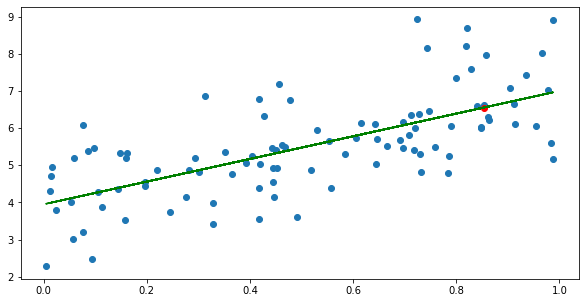

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.scatter(X_new, lin_reg.predict(X_new), c='red')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_ * X, c='green')
print(f'{lin_reg.intercept_}, {lin_reg.coef_[0]} is estimated parameter')

In [5]:
X_b = np.c_[np.ones((100,1)), X]
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.92268324],
       [3.04001465]])

m < n 이거나 특정 feature가 중복되어 행렬 ${X}^{T}{X}$의 역행렬이 없다면 정규방정식을 통해 theta를 구할수가 없다. 

따라서 $\hat{\boldsymbol{\theta}}=\mathbf{X}^{+} \mathbf{y}$을 활용하면 유사역행렬(pseudoinverse mtx, ${X}^{+}$)을 통해 theta를 항상 구할 수 있게된다. 이는 SVD를 통해 계산된다.


정규방정식은 ${X}^{T}{X}$의 역행렬을 계산하기 때문에 Big-O가 ${O(n^{2.4})}$나 ${O(n^{3})}$ 사이다. 즉 feature수 n이 두배 늘어나면 계산량 또한 5.3~8배 증가한다. 

그에 반해 LinearRegression Method의 SVD는 ${O(n^{2})}$이기 때문에 정규방정식 대비 빠른 연산속도를 보인다. 

### 4.2. 경사하강법

#### 4.2.1. Batch Gradient Descent

![](2022-08-17-14-41-08.png)

feature의 scale이 다르면 최적화 알고리즘의 학습이 느려지기 때문에 StandardScaler를 활용하여 GD 학습속도를 향상시킬 수 있다.

$\frac{\partial}{\partial \theta_{j}} \operatorname{MSE}(\boldsymbol{\theta})=\frac{2}{m} \sum_{i=1}^{m}\left(\boldsymbol{\theta}^{\top} \mathbf{x}^{(i)}-y^{(i)}\right) x_{j}^{(i)}$


$\nabla_{\boldsymbol{\theta}} \operatorname{MSE}(\boldsymbol{\theta})=\left(\begin{array}{c}\frac{\partial}{\partial \theta_{0}} \operatorname{MSE}(\boldsymbol{\theta}) \\ \frac{\partial}{\partial \theta_{1}} \operatorname{MSE}(\boldsymbol{\theta}) \\ \vdots \\ \frac{\partial}{\partial \theta_{n}} \operatorname{MSE}(\boldsymbol{\theta})\end{array}\right)=\frac{2}{m} \mathbf{X}^{\top}(\mathbf{X} \boldsymbol{\theta}-\mathbf{y})$

$\boldsymbol{\theta}^{(\text {next step })}=\boldsymbol{\theta}-\eta \nabla_{\boldsymbol{\theta}} \operatorname{MSE}(\boldsymbol{\theta})$


theta에 대한 MSE의 편도함수를 계산하여 cost function의 Gradient Vector를 산출한다. GD Algorithm의 매 step마다 전체 훈련세트 X에 대해 계산하기 때문에 Batch Gradient Descent라고 부른다. 

그러나 특성수에 대해 민감하지 않기 때문에 Noraml Equation, SVD decomposition보다 속도가 빠르다.

In [7]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iter in range(n_iterations):
    grad = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta -= eta * grad

print(theta)

[[3.92268588]
 [3.04001005]]


![](2022-08-17-15-06-27.png.png)

적절한 eta를 찾기 위해선 GridSearch 사용이 권장되며, 반복횟수를 제한하여 hyperparam을 탐색하는데 소요되는 시간을 제한해야한다.

반복횟수를 크게 지정하고 gradient vector값이 작아지면, 즉 벡터의 norm이 허용오차 epsilon보다 작아지면 경사 하강법이 최솟값에 도달한 것으로 간주하고 알고리즘을 중지한다.

이 때 더 정확한 솔루션을 얻기 위해 epsilon값을 줄이게 된다면 그 역수만큼 반복이 늘어나게된다.

#### 4.2.2. Stochastic Gradient Descent

![](2022-08-19-05-01-37.png)

Batch Gradient Descent의 가장 큰 문제점은 매 스텝 전체 훈련세트를 최적화에 활용한다는 점이다. 이 때문에 매 스텝에서 하나의 샘플을 무작위로 선택하여 gradient 값을 계산하는 SGD가 선호된다.

그러나 SGD는 확률적이기 때문에 convex problem이 아닌, local minimum이 산재되어있는 경우에는 global solution을 찾는데에 효과적이지만 알고리즘이 중단되었을 때의 parameter가 최적의 값은 아니다. 

이 딜레마를 해결하기 위해서 우리는 학습률을 점진적으로 감소시켜, 초반에는 수렴을 빠르게하여 local minimum에 빠지지 않도록하고 후반부에는 서서히 움직여 global minimum을 찾을 수 있도록 한다.

In [8]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
print(f'{theta.T} is estimated parameter @ epoch {epoch}')

[[3.97620986 2.92040177]] is estimated parameter @ epoch 49


![](2022-08-19-05-16-59.png)

In [9]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[3.9189276] [2.83161543]


최적화 단계에서 활용되는 샘플은 무작위로 선택되기 때문에 모든 데이터에 대해 골고루 훈련이 진행되기 위해선 IID를 만들어줄 필요가 있다. 

SGDRegressor는 Sample shuffling을 자동으로 수행해주기 때문에 괜찮다.

#### 4.2.3. minibatch Gradient Descent

![](2022-08-19-05-18-27.png)

full training set을 기반으로 연산하는 BGD, 하나의 instance로 학습하는 SGD와 달리 mini-batch GD는 소분된 training set을 vector연산하여 위 두 method의 단점을 보완할 수 있다.

$$
\begin{array}{lllllll}
\text { Algorithm } & \text { Large } m & \text { Out-of-core support } & \text { Large } n & \text { Hyperparams } & \text { Scaling required } & \text { Scikit-Learn } \\
\hline \text { Normal Equation } & \text { Fast } & \text { No } & \text { Slow } & 0 & \text { No } & \text { N/A } \\
\text { SVD } & \text { Fast } & \text { No } & \text { Slow } & 0 & \text { No } & \text { LinearRegression } \\
\text { Batch GD } & \text { Slow } & \text { No } & \text { Fast } & 2 & \text { Yes } & \text { SGDRegressor } \\
\text { Stochastic GD } & \text { Fast } & \text { Yes } & \text { Fast } & \geq 2 & \text { Yes } & \text { SGDRegressor } \\
\text { Mini-batch GD } & \text { Fast } & \text { Yes } & \text { Fast } & \geq 2 & \text { Yes } & \text { SGDRegressor }
\end{array}
$$

### 4.3. 다항 회귀 

sklearn의 PolynomialFeatures method는 독립변수 X를 n차항으로 확장시켜준다. 다변수회귀를 위해 이를 또다시 이를 LinearRegression 돌려줘야하긴 한다.

[-1.00345135] [-1.00345135  1.00691461]


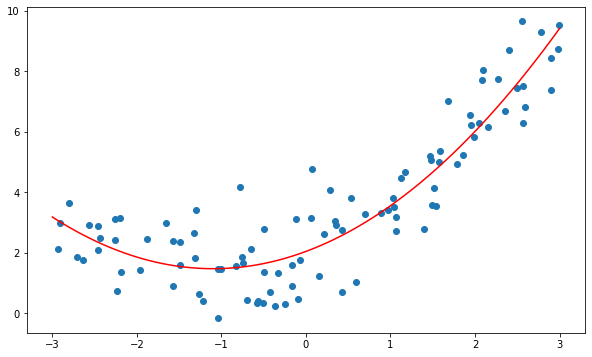

In [10]:
X = 6 * np.random.rand(100, 1) -3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(100,1)

poly_ft = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_ft.fit_transform(X)
print(X[0], X_poly[0])

plt.figure(figsize=(10,6))
plt.scatter(X, y)
poly_reg = LinearRegression(); poly_reg.fit(X_poly, y)
y_pred = poly_reg.predict(poly_ft.fit_transform(np.linspace(-3,3,100).reshape(-1,1)))
plt.plot(np.linspace(-3,3,100), y_pred, 'r-')

### 4.4. 학습곡선

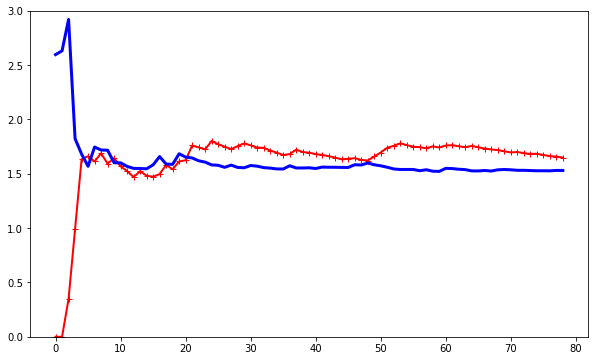

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.figure(figsize=(10,6)); plt.ylim(0.0, 3.0)
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")


lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

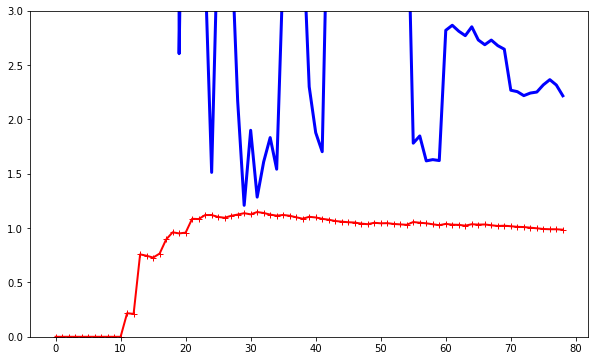

In [12]:
Polynomial_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias = False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(Polynomial_reg, X, y)

* underfitting : RMSE가 높으며 두 곡선이 수평을 달린다. 

* overfitting : RMSE가 낮으나 훈련데이터와 검증데이터간의 RMSE 격차가 유의미하다. 과적합되었기에 초반부 훈련세트에 대한 RMSE가 낮은 수준을 유지할 수 있다. 

### 4.5. Regularization

#### 4.5.1. Ridge Regression

$J(\boldsymbol{\theta})=\operatorname{MSE}(\boldsymbol{\theta})+\alpha \frac{1}{2} \sum_{i=1}^{n} \theta_{i}^{2}$

![](2022-08-19-04-26-06.png)

$\hat{\theta}=\left(\mathbf{X}^{\top} \mathbf{X}+\alpha \mathbf{A}\right)^{-1} \mathbf{X}^{\top} \quad \mathbf{y}$

일반 linear Regression과 같이 Ridge Regression을 통한 theta 구하기도 closed form과 GD로 나뉜다. 장단점은 이전과 같다.

In [13]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_pred = ridge_reg.predict([[1.5]])

sgd_reg = SGDRegressor(penalty="l2") # L2 norm을 적용하겠다는 뜻이니 Ridge Regression 호출
sgd_reg.fit(X, y.ravel())
sgd_pred = sgd_reg.predict([[1.5]])

print(ridge_pred[0], sgd_pred)

[5.03743114] [5.01025722]


#### 4.5.2. Lasso Regression

$J(\boldsymbol{\theta})=\operatorname{MSE}(\boldsymbol{\theta})+\alpha \Sigma_{i=1}^{n}\left|\theta_{i}\right|$

In [14]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.99431493])

![](2022-08-20-01-45-02.png)

Ridge와 대비되는 Lasso의 특징은, 가장 덜 중요한 feature의 weight값을 0 근사값으로 설정한다는 점이다.

가령 위 그림의 오른쪽을 살피면 alpha=1e-07일 때 10차 다항식이 거의 3차식으로 변한 것을 확인할 수 있다. 고차항에 대한 weight가 거의 다 0으로 설정되었기 때문이다. 즉, Lasso를 통해 feature selection이 자동으로 진행된 셈이다.

아래 그림을 살피면 좌측상단의 L1 penalty는 (2, .5)로 init param이 주어졌을 때, 최적화 초기단계에서는 param weight가 동일하게 줄어들지만 이후에는 (1.5, 0)에서 (0,0)으로 향하는 것을 확인할 수 있다. Lasso를 살피면 이러한 경향이 두드러지는데, (.25, -1)에서 initial point가 형성되었을 때, 두번째 weight값이 0으로 향한 다음에서야 global minimum을 찾아가고 있다. 만약 이 때 alpha값을 더 높였다면 global minimum이 원점에 더 가깝게 형성되었을테다. 

그와 달리 Ridge는 특정 feature를 eliminate하진 않는다. 

![](2022-08-20-01-12-42.png)

$$
g(\boldsymbol{\theta}, J)=\nabla_{\theta} \operatorname{MSE}(\boldsymbol{\theta})+\alpha\left(\begin{array}{c}
\operatorname{sign}\left(\theta_{1}\right) \\
\operatorname{sign}\left(\theta_{2}\right) \\
\vdots \\
\operatorname{sign}\left(\theta_{n}\right)
\end{array}\right) \quad \text { where } \operatorname{sign}\left(\theta_{i}\right)=\left\{\begin{array}{cc}
-1 & \text { if } \theta_{i}<0 \\
0 & \text { if } \theta_{i}=0 \\
+1 & \text { if } \theta_{i}>0
\end{array}\right.
$$

Lasso의 cost function은 param = 0일 때 미분불가하다. 따라서 이를 보완하기 위한 방법으로 subgradient가 사용된다.



#### 4.5.3. Elastic Net

$J(\boldsymbol{\theta})=\operatorname{MSE}(\boldsymbol{\theta})+r \alpha \sum_{i=1}^{n}\left|\theta_{i}\right|+\frac{1-r}{2} \alpha \sum_{i=1}^{n} \theta_{i}^{2}$


Elastic Net은 Ridge와 Lasso의 중간지점이다. L1, L2 penalty에 가중치 r을 부여하여 regularization의 성격을 조절할 수 있다. feature의 갯수가 instance의 갯수보다 많을 때, 혹은 특정 multicollinearity가 강하게 작용할 떄 Lasso를 적용하기란 무리가 뒤따를 수 있다. 이 떄문에 Lasso의 과격함을 완화하기 위한 방법으로 Elastic Net 사용이 요구된다. 

In [17]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([-12.89719697])

#### 4.5.4. Early Stopping

만일 검증세트의 오차값이 minimum을 형성하고 넘어서기 시작하면 정규화를 멈춘다. 

아래 그림에서 볼 수 있듯이 epoch가 늘어날수록 훈련세트에 대한 오차값은 작아진다. 그러나 훈련을 거듭할수록 모형은 훈련세트에 과적합되기 시작하고, 이는 out of sample에 대한 오차값 상승으로 이어지기 때문에 좋지 못하다. 따라서 검증세트의 오차값이 minimum을 형성하는 순간 모형의 훈련을 종료한다. 

![](2022-08-19-04-31-12.png)

In [18]:
from sklearn.base import clone
from sklearn.model_selection import train_test_split

# prepare the data
X = 2*np.random.randn(100,1) - 3
y = X**2 + 3*X + 2 + np.random.randn(100,1); y = y.ravel()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.8, random_state=42)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

### 4.6. Logistic Regression

![](2022-08-21-01-38-12.png)

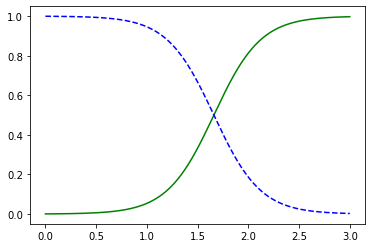

In [21]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(int)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

#### 4.6.1. SoftMax Regression

$$
\hat{p}_{k}=\sigma(\mathbf{s}(\mathbf{x}))_{k}=\frac{\exp \left(s_{k}(\mathbf{x})\right)}{\sum_{j=1}^{K} \exp \left(s_{j}(\mathbf{x})\right)}
$$

$$
\hat{y}=\underset{k}{\operatorname{argmax}} \sigma(\mathbf{s}(\mathbf{x}))_{k}=\underset{k}{\operatorname{argmax}} s_{k}(\mathbf{x})=\underset{k}{\operatorname{argmax}}\left(\left(\boldsymbol{\theta}^{(k)}\right)^{\top} \mathbf{x}\right)
$$

$$
J(\boldsymbol{\Theta})=-\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_{k}^{(i)} \log \left(\hat{p}_{k}^{(i)}\right)
$$

$$
\nabla_{\boldsymbol{\theta}}^{(k)} J(\boldsymbol{\Theta})=\frac{1}{m} \sum_{i=1}^{m}\left(\hat{p}_{k}^{(i)}-y_{k}^{(i)}\right) \mathbf{x}^{(i)}
$$

![](2022-08-21-01-37-17.png)

In [22]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

softmax_reg.predict([[5,2]])
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

#### Problem1

(b) Implement Batch Gradient Descent with early stopping for Softmax Regression

In [45]:
from random import random


X_b = np.c_[np.ones([len(X), 1]), X]

X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [29]:
y_train

array([2, 1, 1, 0, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 0, 0, 2,
       2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0,
       0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0,
       0, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 0, 2, 0, 1, 0, 0])

In [46]:
def one_hot_encoding(y):
    class_num = y.max() + 1; row = len(y)
    res = np.zeros((row, class_num))
    res[np.arange(row), y] = 1
    return res

y_train_enc = one_hot_encoding(y_train)
y_val_enc = one_hot_encoding(y_val)
y_test_enc = one_hot_encoding(y_test)

def softmax_reg(x):
    num = np.exp(x)
    den = np.sum(num, axis=1, keepdims=True)
    return num / den

In [48]:
n_iterations = 1000
eta = 0.01
eps = 1e-7

theta = np.random.randn(3, 3)

for i in range(n_iterations):
    x = X_train.dot(theta)
    prob = softmax_reg(x)
    err = prob - y_train_enc
    grad = 1/len(X_train) * X_train.T.dot(err)
    theta -= grad * eta

In [49]:
theta

array([[ 0.59878519, -0.11614019, -1.69189633],
       [-0.98861436, -0.07517049,  0.24706473],
       [ 0.80358142, -0.69091499, -0.40170642]])

(c) Why 

* Ridge over non-regularized Regression?

모형의 차수가 높아질수록 trainset에 대한 모형의 과적합이 심해진다. 이 때문에 weight값의 크기를 조정하여 testset에 대한 모형의 설명력을 높이기 위해 Ridge를 사용한다.

* Lasso over Ridge?

다만 L2 Norm을 사용하는 Ridge와 달리 L1 Norm을 사용하는 Lasso는 feature selection의 기능까지 수행한다. dataset에 대한 설명력이 떨어지는 feature(고차항)에 대해선 그 weight값을 0으로 줄여주기 때문에 효과적이다.

* Elastic Net over Lasso?

Elastic Net은 Lasso와 Ridge를 결합한 형태로, instance수 대비 feature수가 더 많을 때나 multicollinearity가 강하게 작용할 때 Lasso를 적용하기란 다소 무리가 따르기 때문에 사용한다.